# Comparing Training and Testing Accuracies

You have now run either 18 or 21 classifications. The question is 'which one is best?'. Given that we have outputted the testing and training accuracies lets first compare those.

## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_

# 1. Import Modules

In [1]:
import os
import pprint
import rsgislib.tools.utils
import pandas

# 2. Define the test and train accuracy file paths

In [2]:
acc_refl_stats_json = os.path.join("cls_refl_results", "refl_test_train_acc_stats.json")
acc_linnorm_stats_json = os.path.join("cls_lin_norm_results", "linnorm_test_train_acc_stats.json")
acc_sdnorm_stats_json = os.path.join("cls_sdnorm_results", "sdnorm_test_train_acc_stats.json")

# 3. Read test and train accuracy files

In [3]:
acc_refl_stats_dict = rsgislib.tools.utils.read_json_to_dict(acc_refl_stats_json)
acc_linnorm_stats_dict = rsgislib.tools.utils.read_json_to_dict(acc_linnorm_stats_json)
acc_sdnorm_stats_dict = rsgislib.tools.utils.read_json_to_dict(acc_sdnorm_stats_json)

## 3.1 Print out the dictionaries

Printing out the contents of a small dictionary like these is useful for you to check what data they contain, its structure and that it is what you expected. The `pprint.pprint` function is useful as compared to the normal `print` function it formats the output to make it easier to read.

In [4]:
pprint.pprint(acc_refl_stats_dict)
pprint.pprint(acc_linnorm_stats_dict)
pprint.pprint(acc_sdnorm_stats_dict)

{'refl_et': {'test': 0.9831460674157303, 'train': 1.0},
 'refl_gbt': {'test': 0.9794007490636704, 'train': 1.0},
 'refl_knn': {'test': 0.9906367041198502, 'train': 0.9889830508474576},
 'refl_ml': {'test': 0.12921348314606743, 'train': 0.10621468926553672},
 'refl_nn': {'test': 0.9606741573033708, 'train': 0.9584745762711865},
 'refl_rf': {'test': 0.9812734082397003, 'train': 1.0},
 'refl_svm': {'test': 0.9868913857677902, 'train': 0.9892655367231639}}
{'linnorm_et': {'test': 0.9831460674157303, 'train': 1.0},
 'linnorm_gbt': {'test': 0.9775280898876404, 'train': 1.0},
 'linnorm_knn': {'test': 0.9906367041198502, 'train': 0.9898305084745763},
 'linnorm_ml': {'test': 0.9119850187265918, 'train': 0.9175141242937853},
 'linnorm_nn': {'test': 0.9531835205992509, 'train': 0.9621468926553672},
 'linnorm_rf': {'test': 0.9812734082397003, 'train': 1.0},
 'linnorm_svm': {'test': 0.9831460674157303, 'train': 0.9895480225988701}}
{'sdnorm_et': {'test': 0.9812734082397003, 'train': 1.0},
 'sdnorm_

# 4. Combine Dicts

Note. the syntax for merging dicts used below works by creating a new dict by reading all the data from each of the existing dicts. However, this will fail if any of the dicts have the same key. 

In [5]:
acc_stats_dict = {**acc_refl_stats_dict, **acc_linnorm_stats_dict, **acc_sdnorm_stats_dict}
pprint.pprint(acc_stats_dict)

{'linnorm_et': {'test': 0.9831460674157303, 'train': 1.0},
 'linnorm_gbt': {'test': 0.9775280898876404, 'train': 1.0},
 'linnorm_knn': {'test': 0.9906367041198502, 'train': 0.9898305084745763},
 'linnorm_ml': {'test': 0.9119850187265918, 'train': 0.9175141242937853},
 'linnorm_nn': {'test': 0.9531835205992509, 'train': 0.9621468926553672},
 'linnorm_rf': {'test': 0.9812734082397003, 'train': 1.0},
 'linnorm_svm': {'test': 0.9831460674157303, 'train': 0.9895480225988701},
 'refl_et': {'test': 0.9831460674157303, 'train': 1.0},
 'refl_gbt': {'test': 0.9794007490636704, 'train': 1.0},
 'refl_knn': {'test': 0.9906367041198502, 'train': 0.9889830508474576},
 'refl_ml': {'test': 0.12921348314606743, 'train': 0.10621468926553672},
 'refl_nn': {'test': 0.9606741573033708, 'train': 0.9584745762711865},
 'refl_rf': {'test': 0.9812734082397003, 'train': 1.0},
 'refl_svm': {'test': 0.9868913857677902, 'train': 0.9892655367231639},
 'sdnorm_et': {'test': 0.9812734082397003, 'train': 1.0},
 'sdnorm_

# 5. Create Pandas Dataframe

In [6]:
cls_acc_df = pandas.DataFrame.from_dict(acc_stats_dict, orient="index")
cls_acc_df

,test,train
refl_et,0.983146,1.000000
refl_gbt,0.979401,1.000000
refl_knn,0.990637,0.988983
refl_ml,0.129213,0.106215
refl_nn,0.960674,0.958475
refl_rf,0.981273,1.000000
refl_svm,0.986891,0.989266
linnorm_et,0.983146,1.000000
linnorm_gbt,0.977528,1.000000
linnorm_knn,0.990637,0.989831


# 6. Sort Pandas Dataframe

We can now sort the pandas data frame so we can see the result with the best testing score more easily. We use the testing score and not the training score as the testing score should be more representative of the performance on the image as this data has not been used to train the classifier.

In [7]:
cls_acc_sorted_df = cls_acc_df.sort_values(by=['test'], ascending=False)
cls_acc_sorted_df

,test,train
refl_knn,0.990637,0.988983
linnorm_knn,0.990637,0.989831
sdnorm_svm,0.986891,0.991525
refl_svm,0.986891,0.989266
linnorm_svm,0.983146,0.989548
linnorm_et,0.983146,1.000000
refl_et,0.983146,1.000000
refl_rf,0.981273,1.000000
linnorm_rf,0.981273,1.000000
sdnorm_et,0.981273,1.000000


# 7. Visualise Top 6

Note. we might not have calculated the KNN classifications so these are not included in the visualisation but you might want to edit below to include them. Also, you might have got a different order to the classification accuracies and therefore you might also want to edit the figure below to display your top 6... (Note. the figures displayed below were the top 6 when the notebook was orignally developed and those may have changed with future commits).


Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


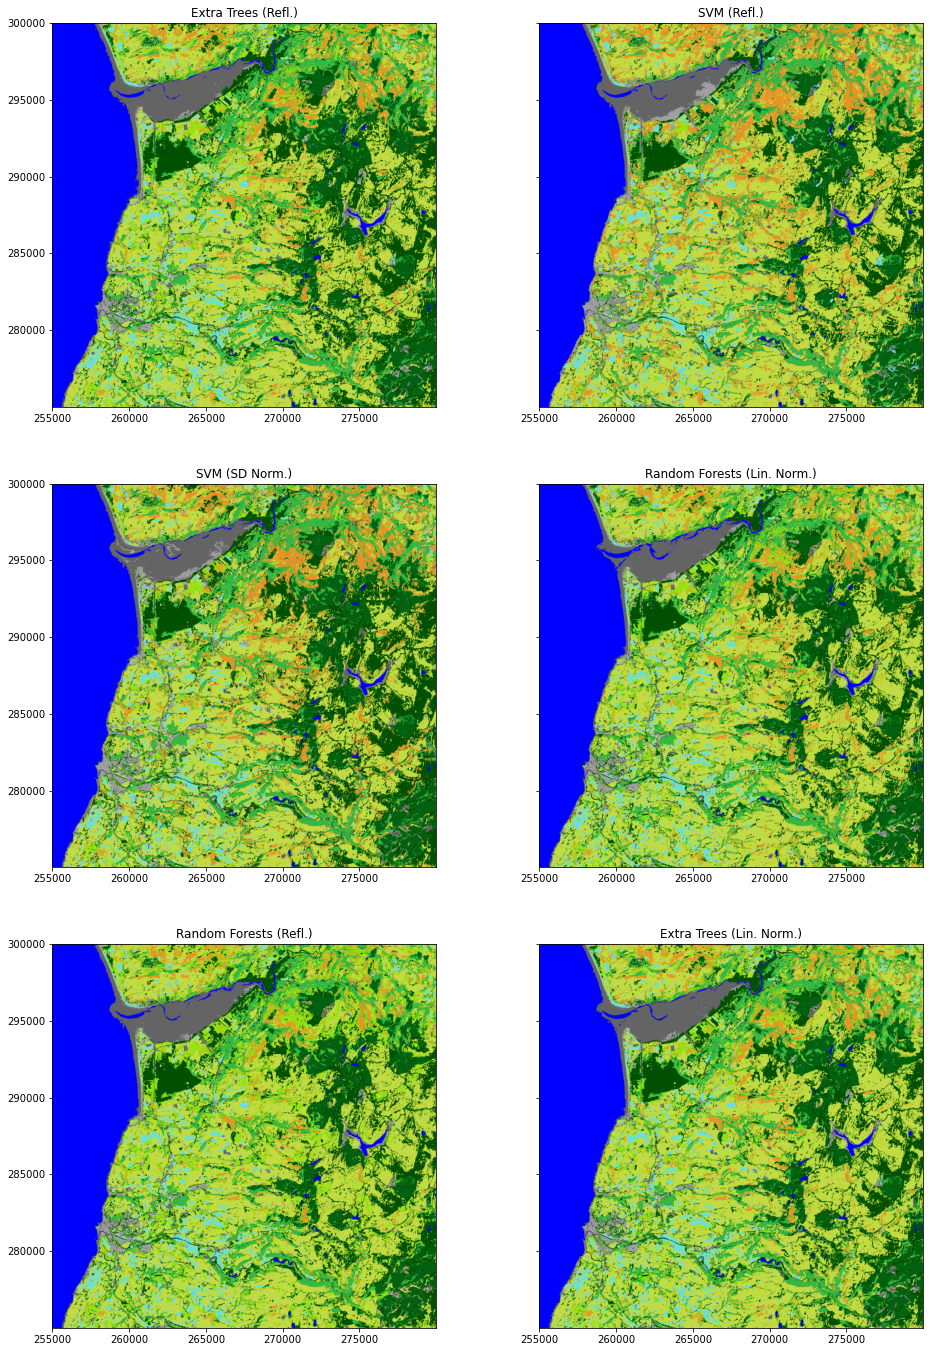

In [8]:
# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Import the RSGISLib plotting module for reading the
# image data into numpy arrays for display.
import rsgislib.tools.plotting

# Define a bbox for the subset to be displayed
# sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create lists of the classification images and the titles the
# plots of those classifications.
cls_rslts = [
    os.path.join("cls_refl_results", "cls_et_refl.kea"),
    os.path.join("cls_refl_results", "cls_svm_refl.kea"),
    os.path.join("cls_sdnorm_results", "cls_svm_sdnorm.kea"),
    os.path.join("cls_lin_norm_results", "cls_rf_linnorm.kea"),
    os.path.join("cls_refl_results", "cls_rf_refl.kea"),
    os.path.join("cls_lin_norm_results", "cls_et_linnorm.kea"),
]
cls_titles = [
    "Extra Trees (Refl.)",
    "SVM (Refl.)",
    "SVM (SD Norm.)",
    "Random Forests (Lin. Norm.)",
    "Random Forests (Refl.)",
    "Extra Trees (Lin. Norm.)",
]

# Create the matplotlib figure - in this case a grid of 2 x 3.
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    3, 2, figsize=(16, 24), sharey=True
)
# Create a list for the 6 axes used for the plot
plot_axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# zip the three lists together so that they are looped
# through together providing the image, title and axis
# for the plot for each one in turn.
for ax, cls_rslt, cls_title in zip(plot_axes, cls_rslts, cls_titles):
    # Get the image data using the get_gdal_thematic_raster_mpl_imshow function.
    (
        img_cls_data,
        img_cls_coords,
        lgd_patches,
    ) = rsgislib.tools.plotting.get_gdal_thematic_raster_mpl_imshow(
        cls_rslt, bbox=sub_img_bbox
    )

    # Use the imshow function to display the image data within the plot
    # the extent option defines the x and y axis values.
    ax.imshow(img_cls_data, extent=img_cls_coords)
    ax.title.set_text(cls_title)

# 8. Conclusions

As we saw in the previous notebooks the training and testing scores are all very similar with high scores for nearly all the classifiers. However, when we visualise the results there is quite a large difference between the results. To numericall quantify these difference we need to undertake an independent formal accuracy assessment.
